In [3]:
!pip install wordcloud -q
!pip install seaborn -q

No se esperaba & en este momento.
No se pudo analizar el valor especificado en una clave del Registro de ejecuci�n autom�tica.
No se esperaba & en este momento.
No se pudo analizar el valor especificado en una clave del Registro de ejecuci�n autom�tica.


In [4]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [5]:
df = pd.read_csv("email.csv", encoding="ISO-8859-1")

In [8]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [9]:
df["Message"][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [10]:
grouped = df.groupby("Category").count()
grouped

,Message
Category,
ham,4825
spam,747
"{""mode"":""full""",1


<Axes: >

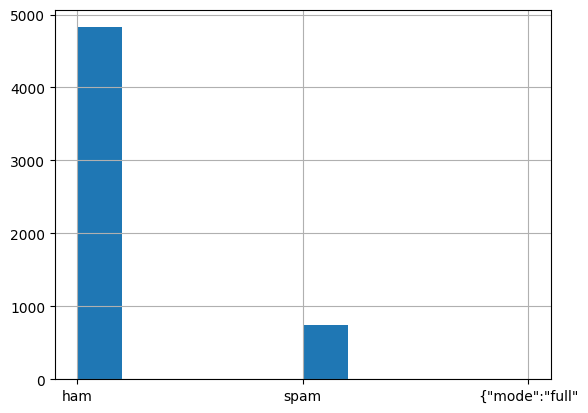

In [11]:
df["Category"].hist()

binarizar los datos para que 0 sea no spam y 1 sea spam

In [12]:
df["b_categorys"] = df["Category"].map({"ham":0, "spam": 1})
Y = df["b_categorys"].to_numpy()

In [13]:
df

,Category,Message,b_categorys
0,ham,"Go until jurong point, crazy.. Available only ...",0.0
1,ham,Ok lar... Joking wif u oni...,0.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1.0
3,ham,U dun say so early hor... U c already then say...,0.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0.0
...,...,...,...
5568,ham,Will Ã¼ b going to esplanade fr home?,0.0
5569,ham,"Pity, * was in mood for that. So...any other s...",0.0
5570,ham,The guy did some bitching but I acted like i'd...,0.0
5571,ham,Rofl. Its true to its name,0.0


In [14]:
Y

array([ 0.,  0.,  1., ...,  0.,  0., nan])